In [53]:
%matplotlib inline     
# ^Sans animations
#matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

*** Voici les fonctions que nous utiliserons ***

In [54]:
def conversion1_jour(jour):
    ''' str * dict -> int
        Conversion : str -> int pour les jours de la semaine '''
    Jour1 = {'lundi':0,'mardi':1,'mercredi':2,'jeudi':3,'vendredi':4,'samedi':5,'dimanche':6}
    return (Jour1[jour])

In [55]:
# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def est_ouvert(heure,jour,horaire):
    '''float * str * dict[tuple] -> bool
    indique si la bibliotheque est ouverte ou fermée en fonction de l'heure actuelle 'heure', 
    du jour de la semaine 'jour' et des horaires d'ouverture 'horaire'  '''
    j = conversion1_jour(jour)
    date = horaire[j]
    if date!= (0,0):
        ouverture = date[0]
        fermeture = date[1]
        return ouverture <= heure < fermeture
    return False

In [56]:
# Exemple : On teste si la bibliothèque est ouverte le lundi à 11h.
print( est_ouvert(22,'lundi',horaire) )

False


In [57]:
# On suppose que phase est valide
# L'union de tous les intervalles doit correspondre aux ouvertures de la bibliothèque
# Les intervalles sont disjoints, de la forme ']debut,fin]'

phase = {'bigenter': [(10,11) , (17,19)] ,  # (arrivée) , (fin des cours)
         'bigexit' : [(12,13) , (21,22)]  , # (déjeuner), (retour chez soi)
         'bigstay':  [(9,10) , (11,12) , (14,17)] , # (arrivée) , (cours) , (cours)
         'unknown':  [(13,14) , (19,21)]  } 

In [58]:
def decoupage(phase,heure):
    ''' dict * float -> str
        retourne la phase correspondante à l'heure
        hyp : est_ouvert(heure...) == True '''
    for cle in phase:
        for couple in phase[cle]:
            debut=couple[0] 
            fin=couple[1]
            if debut <= heure < fin:
                return cle
    return 'error'

In [59]:
#emax : nombre de place restant
# bt : nombre de personne dans la bibliothèque à l'instant t
#nb: nombre d'entree/sortie
def correction(nb,bt,emax):
    '''retourne le nombre d'entrée réalisable.'''
    if nb >= 0:
        if nb > emax:
            nb = emax
    else:
        if -nb > bt: #le signe '-' correspond à la valeur absolue
            nb = -bt    
    return nb

In [60]:
def signe(nombre):
    ''' Nombre -> Nombre
        retourne 1 si Nombre est positif, sinon -1'''
    if nombre < 0:
        return -1
    return 1

In [61]:
def alea_signe():
    ''' None -> int
        retourne aléatoirement 0 ou 1'''
    u = np.random.random() # u est un nombre aléatoire entre 0 et 1
    if u < 0.5: 
        return -1
    return 1

In [62]:
def alea_flux(aff):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité ,retourne 1 si l'élève rentre, sinon 0.
    '''
    u = np.random.random() # u est un nombre aléatoire entre 0 et 1
    if u < 0.5: 
        return 0
    return 1

In [63]:
# s: nombre de personnes qui entrent ou qui sortent de al bibliothèque
def nb_flux(aff,Nom_phase,btmax):
    '''float * int * str * int -> int
       retourne le nombre de flux'''  
    
    # Attention ! : 'bigstay' et 'unknown' sont en valeurs absolues
    #Flux est un dictionnaire de proportion en fonction des phases
    Flux = {"bigenter": 1/2,'bigexit' : -1/6, 'bigstay' : 1/70, 'unknown' : 1/4}
    
    nbtir=round(Flux[Nom_phase]*btmax)
    s=0
    for i in range(abs(nbtir)):
        s += alea_flux(aff)
    s*= signe(nbtir)
    
    if Nom_phase == 'bigstay' or Nom_phase == 'unknown':
        s*=alea_signe()
    return s

## Modèle 4 : modélisation géographique

***Remplissage d'une matrice de nombre en fonction de l'etude et l'etat_social.***

Les nombres  utilisées sont : 1 0 -1

"1": place occupée

"0": place libre

"-1": espace non utilisable (murs,allées...)

    M =np.zeros((nblignes,nbcolonnes),dtype = ...)

    len(M[:,0]))  : # nombre de lignes.
    len(M[0,:])) : # nombre de colonnes.
    
    M[:,y] accès pour la y+1 ème colonne.
    M[x,:] accès pour la x+1 ème ligne.

### A.Nous crééons le côté math de la BDL.

In [64]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from pylab import*
from random import randint

In [65]:
# Le dictionnaire "D_table" est le plan de la bibliothèque.
# clé : nombre de place des tables
# A chaque "clé" est associé des informations sur les tables, sous la forme : (debut, nbtables, largeur)

# debut : coordonnées sous la forme d'un tuple du coin gauche de la table.
# nbtables : nombre de tables de même largeur sur une colonne.
# largeur : nombre de lignes occupées par la table de travail.

D_table = {10: [(1, 1, 2), (4, 1, 2), (7, 1, 2), (13, 1, 2), (16, 1, 2), (19, 1, 2), 
      (22, 1, 2), (25, 1, 2), (28, 1, 2), (31, 1, 2), (34, 1, 2), (37, 1, 2), (14, 15, 2), 
      (18, 15, 2), (22, 15, 2), (26, 15, 2), (30, 15, 2), (35, 15, 2)], 
     6: [(1, 9, 2), (10, 1, 2),(18, 9, 2), (22, 9, 2), (35, 9, 2)]}


In [66]:
print(initM(21,40,D_table) )

[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 

In [67]:
# On va faire une copie de D_table : Dic_plan.
# Dic_plan sera notre bibliothèque initiale.

import copy
Dic_plan = copy.deepcopy(D_table)
print(initM(21,40,Dic_plan))

[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 

Nous allons créer une fonction Affiche_rectangle qui permettra de dessiner les tables de travail sur les 

matrices.

In [68]:
# M[:,y] accès pour la y+1 ème colonne.
# M[x,:] accès pour la x+1 ème ligne.
# c3 : signifie place libre

# initialisation d'une liste qu'avec des -1
L = [ [  -1 for _ in range(21) ] ] * 36
# conversion vers le type array
M = np.asarray(L)

In [69]:

def Affiche_rectangle(X,c,n,M):
    ''' (int*int) * str * int -> None
    X : coin gauche de la table de coordonnées (x,y)
    c : caractère à afficher dans le rectangle
    n : le nombre de caractères du rectangle (pair)
    l : largeur de la table
    L : longueur de la table
    '''
    
    L = int(n/2)
    
    x = X[0]
    y = X[1]
    l = X[2]
    
    M[x:x+l , y:y+L] = c
    return M

In [70]:
# Voici un premier test, où on vient de dessiner une table de coordonnées (0,1), de largeur 2 et de 10 places avec '0'
# comme caractère de remplissage.
print ( Affiche_rectangle((0,1,2),0,10,M) )

[[-1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1

In [71]:
def initM(nbcol,nblig,D_table):
    #choix des caractères
    c1 = 7
    c2 = 1
    c3 = 0
    # initialisation d'une liste qu'avec des 'c1'
    L = [ [  c1 for _ in range(nbcol) ] ] * nblig
    # conversion vers le type array
    M = np.asarray(L)
    
    ''' int * int -> matrix
    retourne la matrice représentant la géographie de la bibliothèque'''
    
    for key in D_table:
        for X in D_table[key]:
            M = Affiche_rectangle(X,c3,key,M)
            
    return M

In [72]:
print(initM(21,40,D_table) )



[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 0 0 0 7 7 7 0 0 0 0 0 7]
 [7 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 0 0 

In [73]:
# écrivons une fonction qui calcule le nombre de places d'une bibliothèque

def Nbplaces(D):
    '''DIC -> int
    retourne le nombre de places d'une bibliothèque'''
    
    NbPlaces = 0
    
    for cle in D:
        NbPlaces += len(D[cle])*cle
    return NbPlaces

In [74]:
# Dans notre bibliothèque il y a :
Nbplaces(Dic_plan)

210

In [75]:
# écrivons une fonction qui calcule les coordonnées de toutes les places de la bibliothèque.

# (i,j) : place en haut à gauche d'une table
# L : longueur de la table
# l : largeur de la table

def Pos_place(D):
    '''Dic -> LISTE
    retourne une liste de positions (x,y)'''
    liste=[]
    for cle in D:
        for up in D[cle]:
            i,j,L,l = up[0],up[1],cle//2,up[2]
            for x in range(i,i+l):
                for y in range(j,j+L):
                    liste.append((x,y))
                
            
    return liste

In [83]:
# On affiche toutes les positions(x,y) de toutes les places de la bibliothèque.
print(Pos_place(Dic_plan),"\n")
# On vériie le nombre de places : 
print(len(Pos_place(Dic_plan)),"PLACES")
L_Pos = Pos_place(Dic_plan)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (16, 1), (16, 2), (16, 3), (16, 4), (16, 5), (17, 1), (17, 2), (17, 3), (17, 4), (17, 5), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (20, 1), (20, 2), (20, 3), (20, 4), (20, 5), (22, 1), (22, 2), (22, 3), (22, 4), (22, 5), (23, 1), (23, 2), (23, 3), (23, 4), (23, 5), (25, 1), (25, 2), (25, 3), (25, 4), (25, 5), (26, 1), (26, 2), (26, 3), (26, 4), (26, 5), (28, 1), (28, 2), (28, 3), (28, 4), (28, 5), (29, 1), (29, 2), (29, 3), (29, 4), (29, 5), (31, 1), (31, 2), (31, 3), (31, 4), (31, 5), (32, 1), (32, 2), (32, 3), (32, 4), (32, 5), (34, 1), (34, 2), (34, 3), (34, 4), (34, 5), (35, 1), (35, 2), (35, 3), (35, 4), (35, 5), (37, 1), (37, 2), (37, 3), (37, 4), (37

In [77]:
# Nous allons générer soit '0' soit '1', cela nous sera utile pour remplir notre bibliothèque aléatoirement.

def alea_entre2():
    u = np.random.random()            # u est un nombre aléatoire entre 0 et 1
    if u < 0.5:
        return 1
    else:
        return 0
print(alea_entre2())

0


 **Rappel : Comment manipuler les matrices efficacement ? **
  
  
            len(M[:,0])  : # nombre de lignes.
            len(M[0,:]) : # nombre de colonnes.

            M[:,y] accès pour la y+1 ème colonne.
            M[x,:] accès pour la x+1 ème ligne.

In [78]:
# Importons le module 'randint'
from random import randint

# Nous conservons notre dictionnaire initial
Dic_plan = {10: [(1, 1, 2), (4, 1, 2), (7, 1, 2), (13, 1, 2), (16, 1, 2), (19, 1, 2), (22, 1, 2), (25, 1, 2), (28, 1, 2), 
            (31, 1, 2), (34, 1, 2), (37, 1, 2), (14, 15, 2), (18, 15, 2), (22, 15, 2), (26, 15, 2), (30, 15, 2), (35, 15, 2)], 
            6: [(1, 9, 2), (10, 1, 2), (18, 9, 2), (22, 9, 2), (35, 9, 2)]}

# Nous initialisons notre matrice avec Dic_plan.
M = initM(21,40,Dic_plan)

# Nous calculons le nombre de places de la bibliothèque.
nbPlaces = Nbplaces(Dic_plan)

# Les dimensions de la matrice.
nbColonnes = 21
nbLignes  = 40

def RemplissageMath(flux,M): #après mettre les 4 paramètres ( (matiere,etude) ,etat_social)
    '''int * matrix -> matrix
    retourne matrice après lui avoir appliquée le flux "nb" '''
    
    nbLig , nbCol = len(M[:,0]) , len(M[0,:])
    iLig, iCol = 0,0
    
    if(flux == 0):
        return M
    elif(flux > 0):
        for loop in range(flux):
            while( (M[iLig,iCol]) !=0  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 1
        return M
    else:
        for loop in range(abs(flux)):
            while( (M[iLig,iCol]) != 1  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 0
        return M

In [79]:
def verif_placement(M):
    Nbpersonnes = 0
    for couple in L_Pos:
        if(M[couple[0],couple[1]]):
            Nbpersonnes+=1
    return Nbpersonnes

In [84]:
# Nous plaçons 100 personnes aléatoirement dans la bibliothèque.
print(RemplissageMath(100,M),"\n")

# Nous vérifions que nous avons bien placé 100 personnes:
print(verif_placement(M))


# Nous vidons la bibliothèque.
M = initM(21,40,Dic_plan)

[[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 0 1 1 1 7 7 7 1 1 1 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 1 1 7 7 7 1 1 1 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 0 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 1 1 1 1 1 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 1 1 1 1 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 1 1 1 7 7 7 1 1 1 1 1 7]
 [7 1 1 1 1 1 7 7 7 1 1 1 7 7 7 1 1 1 1 1 7]
 [7 1 1 1 1 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 1 1 1 

### B.remplissage avec le temps

Nous allons modéliser l'évolution du remplissage de la bibliothèque de manière géographique.

Nous appliquerons la fonction 'Modif_matrice(nb,M)' qui obéira aux règles suivantes :
    
    - Si le flux est nul, la matrice ne sera pas modifiée.
    - Si le flux est strictement négatif, les '1' rencontrés deviendront '0'.
    - Si le flux est strictement positif, les '0' rencontrés deviendront '1'.
    - Les allées et les murs de la bibliothèque, représentés par des '7' seront non-modifiables.

In [85]:
 def RemplissageMath(flux,M): #après mettre les 4 paramètres ( (matiere,etude) ,etat_social)
    '''int * matrix -> matrix
    retourne matrice après lui avoir appliquée le flux "nb" '''
    
    nbLig , nbCol = len(M[:,0]) , len(M[0,:])
    iLig, iCol = 0,0
    
    if(flux == 0):
        return M
    elif(flux > 0):
        for loop in range(flux):
            while( (M[iLig,iCol]) !=0  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 1
        return M
    else:
        for loop in range(abs(flux)):
            while( (M[iLig,iCol]) != 1  ):
                iLig = randint(0,nbLig - 1)
                iCol = randint(0,nbCol - 1)
            M[iLig,iCol] = 0
        return M

In [86]:
# Bibliothèquetemp3 permet en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# emax : nombre place restant
# nb : nombre d'entree/sortie
# On fera un cycle de 24h

# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

# On suppose que phase est valide.

#découpage de la journée en plusieurs phases

phase = {'bigenter': [(10,11) , (17,19)] ,  # (arrivée) , (fin des cours)
         'bigexit' : [(12,13) , (21,22)]  , # (déjeuner), (retour chez soi)
         'bigstay':  [(9,10) , (11,12) , (14,17)] , # (arrivée) , (cours) , (cours)
         'unknown':  [(13,14) , (19,21)]  } 

#Notre nouvelle fonction bibliothèquetemp3 utilisera les matrices.

def bibliothèquetemp3(bt0,btmax,jour,heure):
                    #(int, int,str ,int)
    ''' hyp : 0 <= bt <= btmax'
        Retourne l'état de la matrice à l'heure voulue.'''
    
    # Nous initialisons notre matrice avec Dic_plan.
    M = initM(21,40,Dic_plan)
    
    bt=bt0
    aff=bt/btmax
    
    for t in range(heure+1):
        if est_ouvert(t,jour,horaire):
            Nom_phase = decoupage(phase,t)
            emax = btmax-bt
            nb=nb_flux(aff,Nom_phase,btmax)
            nb=correction(nb,bt,emax)
            bt+=nb
            M=RemplissageMath(nb,M)
        else:
            bt=0
            M = initM(21,40,Dic_plan)
            
        aff=bt/btmax
    
    print(verif_placement(M),"personnes dans la bibliothèque","\n")
    return M


#annimation M en fonction du temps

60 personnes dans la bibliothèque 



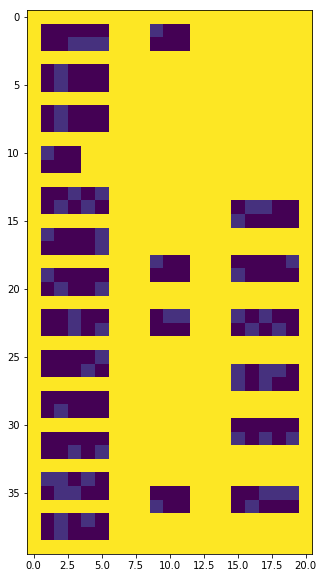

In [87]:

# On calcule le nombre de personnes le lundi à 10h
M = bibliothèquetemp3(0,210,'lundi',10)
fig = plt.figure(figsize=(10,10))
plt.imshow(M,figure=fig)


In [ ]:
semaine = ['lundi' ,'mardi','mercredi','jeudi','vendredi','samedi','dimanche']
fig = plt.figure(figsize=(20,20))
im_list = []
for jours in semaine:
    for heure in range(24):
        M = bibliothèquetemp3(0,210,jours,heure)
        im = plt.imshow(M,figure=fig,animated = True)
        im_list.append([im])
ani = animation.ArtistAnimation(fig, im_list, interval=175, blit=True, repeat_delay=1000)
ani.save('dynamic_images.mp4')

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

46 personnes dans la bibliothèque 

47 personnes dans la bibliothèque 

27 personnes dans la bibliothèque 

6 personnes dans la bibliothèque 

55 personnes dans la bibliothèque 

4 personnes dans la bibliothèque 

56 personnes dans la bibliothèque 

63 personnes dans la bibliothèque 

95 personnes dans la bibliothèque 

177 personnes dans la bibliothèque 

48 personnes dans la bibliothèque 

110 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 personnes dans la bibliothèque 

0 person